In [2]:
%matplotlib inline
import Quandl
import pandas
import matplotlib.pyplot as plt

In [3]:
countries = ["WWDI/CHL_NY_GNP_PCAP_CD", "WWDI/URY_NY_GNP_PCAP_CD", "WWDI/HUN_NY_GNP_PCAP_CD"]
mydataframe = Quandl.get(countries)


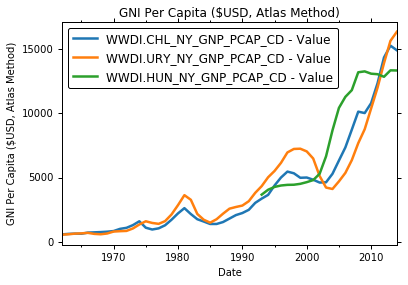

In [4]:
mydataframe.plot();
plt.legend(loc='best');
plt.title("GNI Per Capita ($USD, Atlas Method)");
plt.xlabel('Date'); 
plt.ylabel('GNI Per Capita ($USD, Atlas Method)');


In [3]:
file = open('country_codes.txt').read()
a= file.split('\n')

In [4]:
country = {}
for c in range(2, len(a)-2):
    c, co = a[c].split('|')
    country[c] = co

In [5]:
file2 =open('wwdi_indicators.txt').read()
b = file2.split('\n')

In [6]:
indicators = {}
for c in range(2, len(b)-2):
    ind, co = b[c].split('|')
    indicators[ind] = co

In [7]:
def plot_c(countr, indic):
    co = country[countr]
    ind = indicators[indic]
    first= Quandl.get("WWDI/" + str(co) +"_"+ str(ind))
    first.plot()
    plt.legend(loc='best')
    plt.title(indic)
    plt.xlabel('Date') 
    plt.ylabel(indic)

    

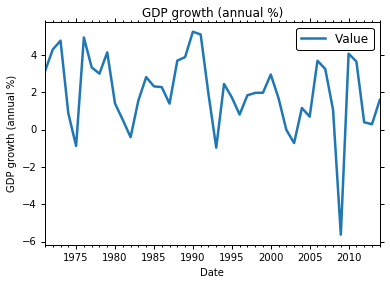

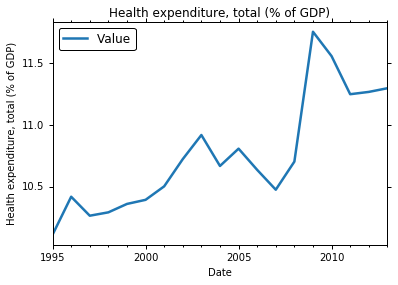

In [8]:
plt.figure(figsize=(50,40))
plot_c('Germany', 'GDP growth (annual %)')
plot_c('Germany', 'Health expenditure, total (% of GDP)')



In [9]:
rel_ind = ["Arable land (% of land area)", "Urban population (% of total)", "Urban population growth (annual %)", "Rural population (% of total population)", "Rural population growth (annual %)", "Tax revenue (% of GDP)",
         "Patent applications, residents","Labor force, female (% of total labor force)", "Labor participation rate, total (% of total population ages 15+)", "Labor force with primary education (% of total)", "Labor force with secondary education (% of total)", "Secondary education, pupils", "Primary education, pupils", "Literacy rate, adult total (% of people ages 15 and above)", "Literacy rate, youth female (% of females ages 15-24)", "Literacy rate, youth total (% of people ages 15-24)", 
          "Telephone lines (per 100 people)", "Access to electricity (% of population)", "Roads, paved (% of total roads)", "Roads, total network (km)", "Vehicles (per km of road)", "Mobile cellular subscriptions (per 100 people)", "Improved sanitation facilities (% of population with access)", "Improved sanitation facilities, rural (% of rural population with access)",
          "Maternal mortality ratio (national estimate, per 100,000 live births)" ]

'''

returns numpy array of X and Y data values

params:
    country - name of Country of interest
    targets - code of target(Y) indicators


'''

def get_data_arr(countr, targets):
    
    indics = []
    targs = []
    k = 0
    for ind in rel_ind:
        indics.append("WWDI/" + str(country[countr]) + "_"+ str(indicators[ind]))
            
    for targ in targets:
        targs.append("WWDI/" + str(country[countr]) + "_"+ str(indicators[targ]))
    
    x = Quandl.get(indics, authtoken = "eZi-HRUBuesv9PTuzE16")
    y = Quandl.get(targs, authtoken = "eZi-HRUBuesv9PTuzE16") 
    return x,y
        
        
        
        

In [10]:
x,y = get_data_arr("Germany", ["GDP growth (annual %)"] )

In [11]:
xxx = x[12:]
xxe  = xxx.fillna(0)
X = xxe.as_matrix()
Y = y.as_matrix()

In [1]:
import statsmodels.api as sm


In [13]:
model = sm.OLS(Y,X)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     3.256
Date:                Thu, 10 Mar 2016   Prob (F-statistic):            0.00386
Time:                        20:54:26   Log-Likelihood:                -76.340
No. Observations:                  44   AIC:                             196.7
Df Residuals:                      22   BIC:                             235.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2904      0.441      0.658      0.5